In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools
from tools import cmp

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Karthaus/karthaus_processed_mnp_ingested.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 928 × 3000
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltype-immune'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PatientNum_colors', 'batch_colors', 'celltype-immune_colors', 'celltypes_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'

In [6]:
adata.obs['celltype-immune'].value_counts()

DC             484
Mac1           269
Mac2            81
Mono            75
Mac-MT1         18
Mac-cycling      1
Name: celltype-immune, dtype: int64

In [5]:
len(list(set(adata.obs['PatientNum'])))

8

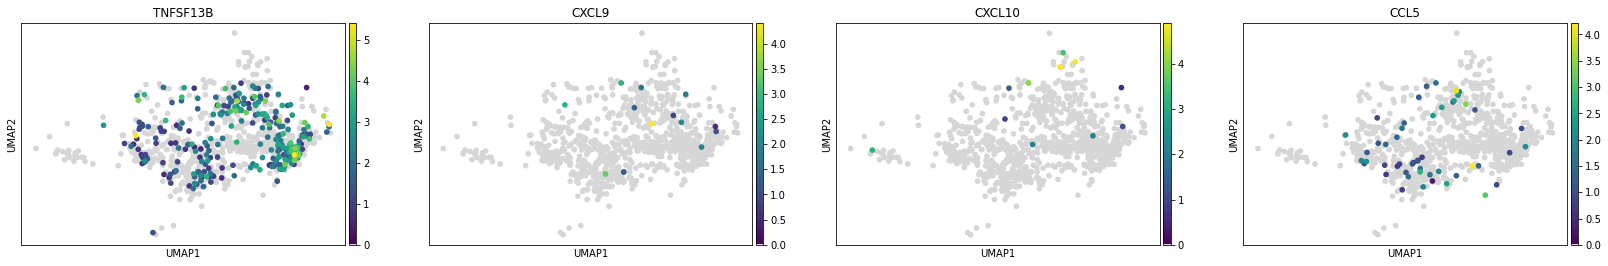

In [3]:
sc.pl.umap(adata, color = ['TNFSF13B', 'CXCL9', 'CXCL10', 'CCL5'], color_map = cmp())

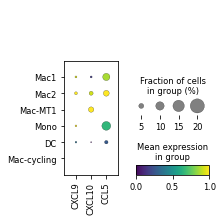

In [4]:
sc.pl.dotplot(adata, ['CXCL9', 'CXCL10', 'CCL5'], groupby = 'celltype-immune', standard_scale = 'var', color_map = 'viridis')